<a href="https://colab.research.google.com/github/Bortak10/POSI/blob/main/Tutorial8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 8

## Introduction

### How does KNN work?

The KNN algorithm works by comparing new data with known data (the so-called training data). Its main idea is that objects that are "close to each other" (i.e., have similar features) are more alike and should be classified in the same way. The process works as follows:

1. **Determine the number of neighbors (K)** - the user selects the number $ K $, which is how many nearest neighbors to consider for classification.
2. **Calculate distances** - for a given point (e.g., a new example that we want to classify), the algorithm calculates the distance to all other points in the training set (usually the Euclidean distance is used, but other distances, like Manhattan, can be used).
3. **Select the K nearest neighbors** - the algorithm selects $ K $ points from the training dataset that are closest to the point we want to classify.
4. **Classification/average** - based on the class (for classification) or value (for regression) of the $ K $ nearest neighbors, the algorithm assigns a label to the new point. In classification, it will usually be the most frequent class among the $ K $ neighbors, and in regression, the average value.

<br>

#### Example:

Let's assume you have a dataset about flowers with two features: petal length and width. You want to classify a new flower. The KNN algorithm will find the $ K $ most similar flowers in the training set (e.g., the 5 nearest ones) and assign a label to the new flower based on the majority (e.g., "iris-setosa," if 3 out of the 5 nearest are setosas).

<br>

#### Advantages and Disadvantages:

##### Advantages:
- Easy to understand and implement.
- Does not require training a model, works "on the fly."
- Can be used for many types of data (e.g., classification, regression).

##### Disadvantages:
- **Computational performance**: the larger the dataset, the more operations are required.
- **Sensitivity to noise and irrelevant features.**
- Requires a suitable distance metric (though in some cases it can be difficult to choose).


### Distance Metrics

#### 1. Euclidean Distance

This is the most commonly used metric, especially in classic classification and regression tasks when the data is continuous.

##### Formula:

$$
d_E = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \dots + (x_n - y_n)^2}
$$

Where:

- $ x_1, x_2, \dots, x_n $ are the coordinates of point $ x $,
- $ y_1, y_2, \dots, y_n $ are the coordinates of point $ y $,
- $ n $ is the number of dimensions (features).

##### Example:

If we have two points in 2 dimensions: $ x = (3, 4) $ and $ y = (7, 1) $, the Euclidean distance between them is:

$$
d_E = \sqrt{(3 - 7)^2 + (4 - 1)^2} = \sqrt{(-4)^2 + 3^2} = \sqrt{16 + 9} = \sqrt{25} = 5
$$

<br>

#### 2. Manhattan Distance

This is an alternative measure that sums the differences in coordinates along each axis. It is particularly useful when the data is organized in a grid (e.g., in problems related to movement in cities).

##### Formula:

$$
d_M = |x_1 - y_1| + |x_2 - y_2| + \dots + |x_n - y_n|
$$

##### Example:

For the points $ x = (3, 4) $ and $ y = (7, 1) $, the Manhattan distance is:

$$
d_M = |3 - 7| + |4 - 1| = 4 + 3 = 7
$$

<br>

#### 3. Minkowski Distance

This is a general form of the two metrics above. The Minkowski distance can take different values depending on the parameter $ p $.

##### Formula:

$$
d_M = \left( |x_1 - y_1|^p + |x_2 - y_2|^p + \dots + |x_n - y_n|^p \right)^{1/p}
$$

When $ p = 1 $, the Minkowski distance is equal to the Manhattan distance.

When $ p = 2 $, it is the Euclidean distance.

##### Example:

For the points $ x = (3, 4) $ and $ y = (7, 1) $, if $ p = 3 $:

$$
d_M = \left( |3 - 7|^3 + |4 - 1|^3 \right)^{1/3} = \left( 4^3 + 3^3 \right)^{1/3} = \left( 64 + 27 \right)^{1/3} = 91^{1/3} \approx 4.5
$$

<br>

#### Summary

Depending on the characteristics of the data and the problem, you can choose the appropriate distance metric:

- **Euclidean** - most commonly used for general tasks (continuous data).
- **Manhattan** - for data that describes "movement" in a grid.
- **Minkowski** - a general form, allowing experimentation with the parameter $ p $.


## Exercise 1
For the `load_wine` dataset from the `sklearn.datasets` module, perform a DEA analysis and classify the `target` feature using `KNN`. Test the model's performance for different values of `k-neighbors`. Remember to scale the data.

<br>

Example of loading data:


```
from sklearn.datasets import load_wine

wine = load_wine()

X = wine.data
y = wine.target
```

In [26]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

wine = load_wine()

X = wine.data
y = wine.target

df = pd.DataFrame(X)
df['target'] = y

display(df.info())

print("Table of null values")
display(df.isnull().sum())
print()

print("Target")
display(df['target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  target  178 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


None

Table of null values


,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0



Target


,count
target,
1,71
0,59
2,48


Boxplot of 0:



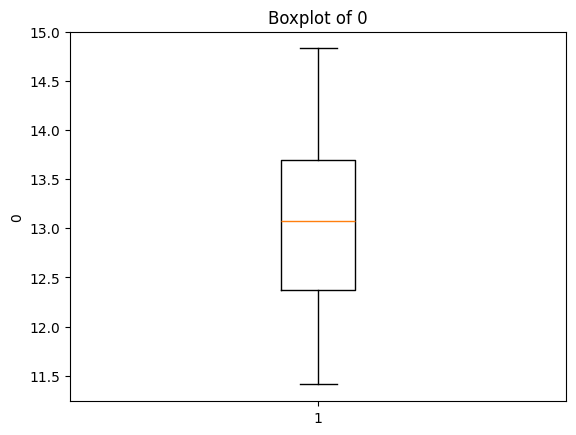


Boxplot of 1:



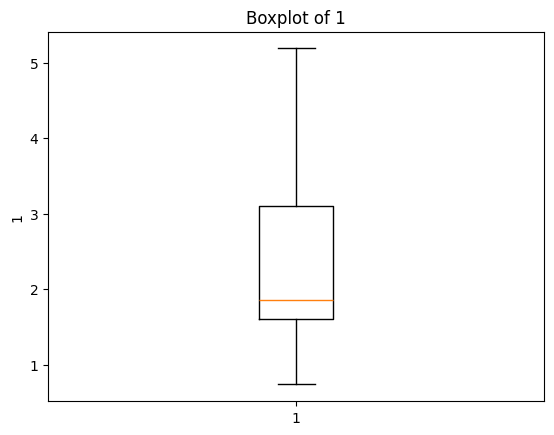


Boxplot of 2:



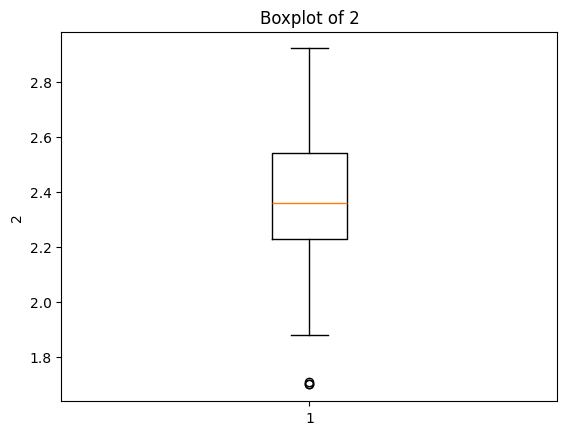


Boxplot of 3:



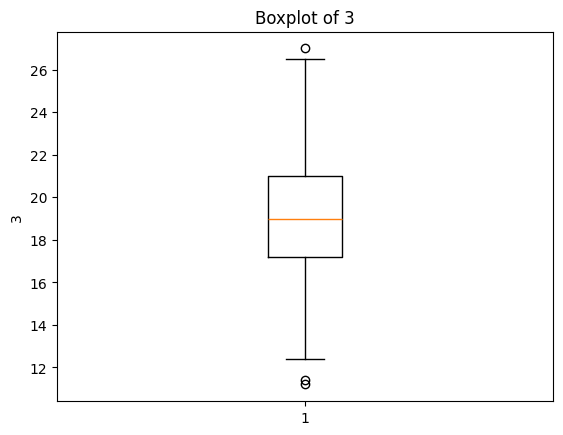


Boxplot of 4:



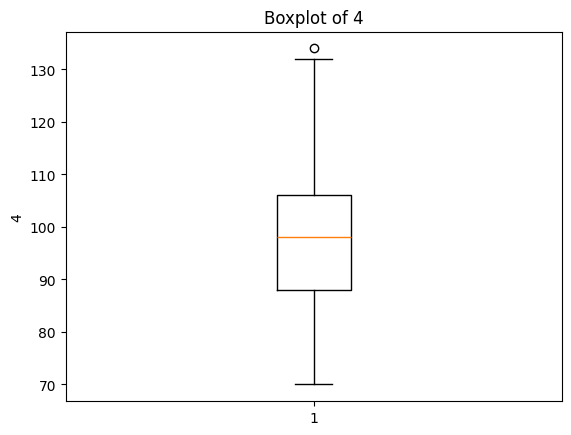


Boxplot of 5:



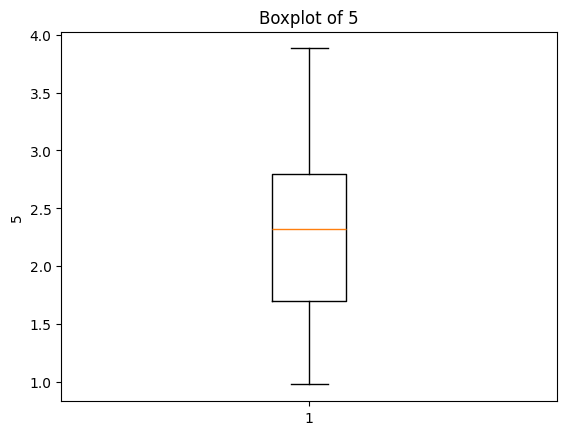


Boxplot of 6:



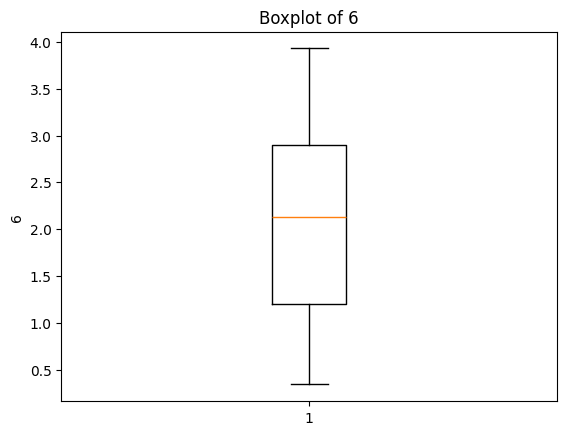


Boxplot of 7:



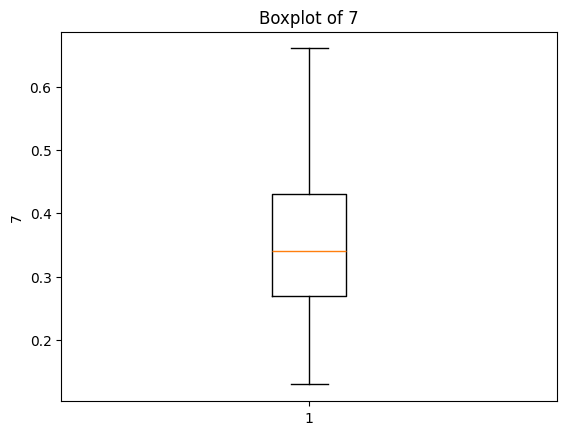


Boxplot of 8:



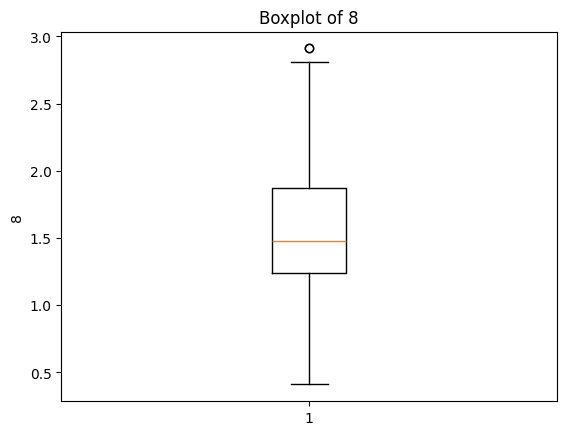


Boxplot of 9:



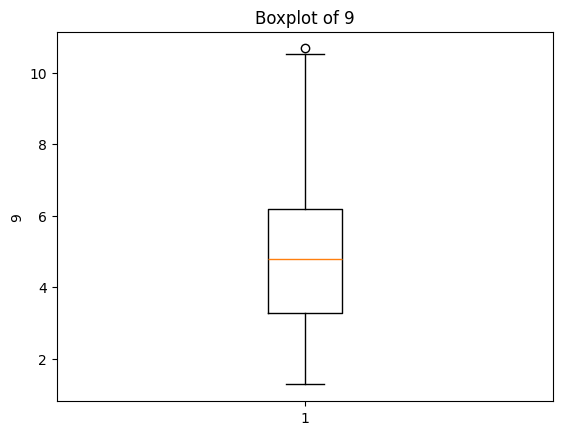


Boxplot of 10:



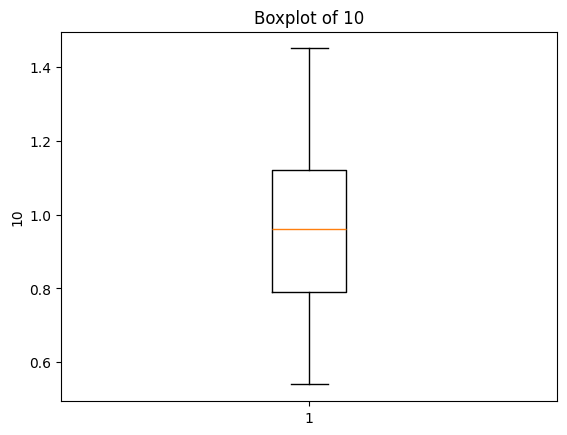


Boxplot of 11:



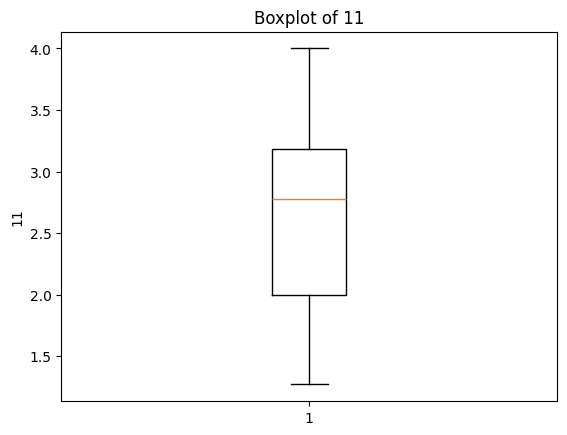


Boxplot of 12:



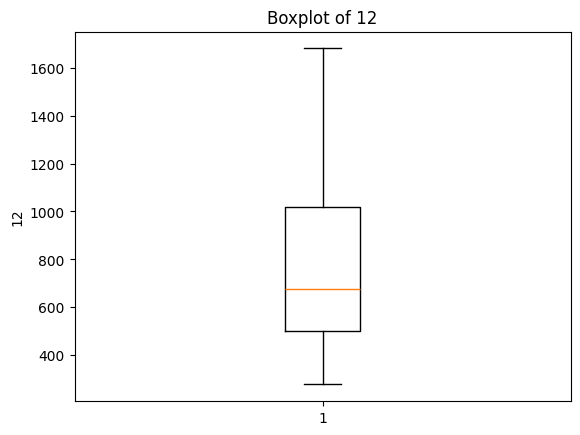


Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, target]
Index: []

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, target]
Index: []

         0     1     2     3     4     5     6     7     8    9    10    11  \
66   13.11  1.01  1.70  15.0  78.0  2.98  3.18  0.26  2.28  5.3  1.12  3.18   
76   13.03  0.90  1.71  16.0  86.0  1.95  2.03  0.24  1.46  4.6  1.19  2.48   
100  12.08  2.08  1.70  17.5  97.0  2.23  2.17  0.26  1.40  3.3  1.27  2.96   

        12  target  
66   502.0       1  
76   392.0       1  
100  710.0       1  

         0     1     2     3      4     5     6     7     8     9    10    11  \
1    13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
13   14.75  1.73  2.39  11.4   91.0  3.10  3.69  0.43  2.81  5.40  1.25  2.73   
157  12.45  3.03  2.64  27.0   97.0  1.90  0.58  0.63  1.14  7.50  0.67  1.73   

         12  target  
1    1050.0       0  
13   1150.0       0  
157   880.0       2  

        0

None

In [19]:
columns = df.drop(columns="target").columns

for col in columns:
    print(f"Boxplot of {col}:")
    print()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()
    print()

for col in columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(outliers)
  print()

  outlier_indices = outliers.index.union(outliers.index)
  df = df.drop(outlier_indices)

display(df.info())

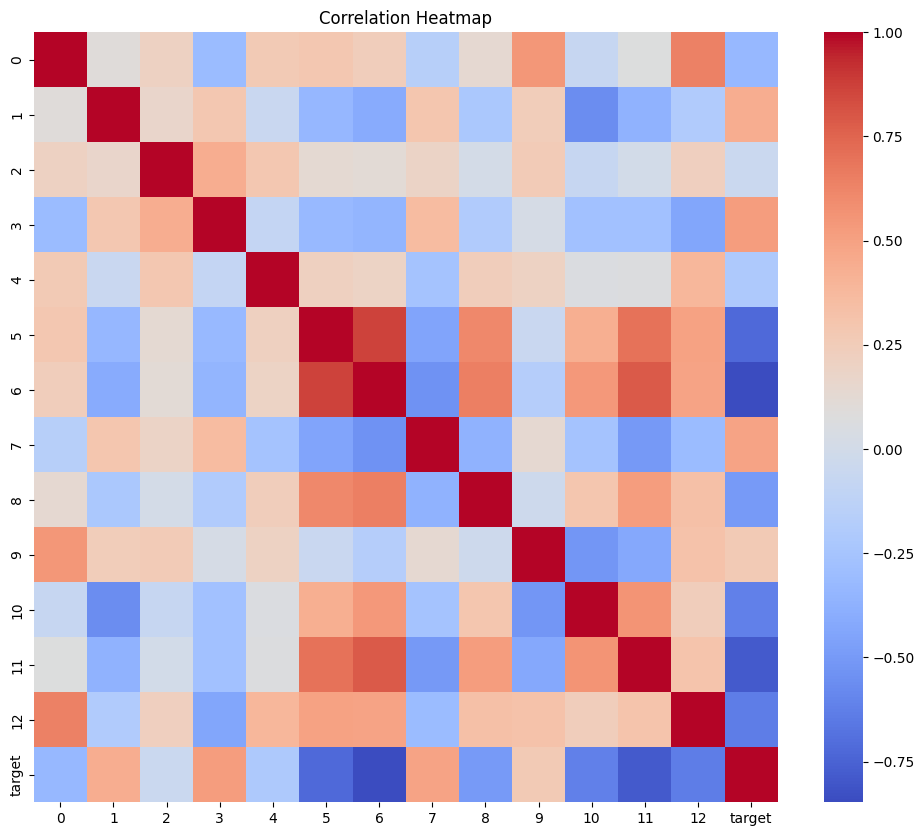

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
print("Table of the statistical data for all numerical columns:")
display(df.drop(columns="target").describe())
print()
print("Target")
display(df['target'].value_counts())

Table of the statistical data for all numerical columns:


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.034596,2.318199,2.364658,19.300621,98.590062,2.280435,2.026894,0.359006,1.538758,5.033913,0.956932,2.619876,753.819876
std,0.791422,1.053406,0.241922,2.974149,12.401347,0.628964,0.981421,0.121821,0.513838,2.155207,0.217376,0.713409,317.816297
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,12.370000,1.610000,2.230000,17.200000,88.000000,1.700000,1.200000,0.270000,1.240000,3.270000,0.790000,2.000000,502.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.320000,2.130000,0.340000,1.480000,4.800000,0.960000,2.780000,675.000000
75%,13.690000,3.100000,2.540000,21.000000,106.000000,2.800000,2.900000,0.430000,1.870000,6.200000,1.120000,3.180000,1020.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.910000,10.680000,1.450000,4.000000,1680.000000



Malignant & Benign


,count
target,
1,61
0,57
2,43


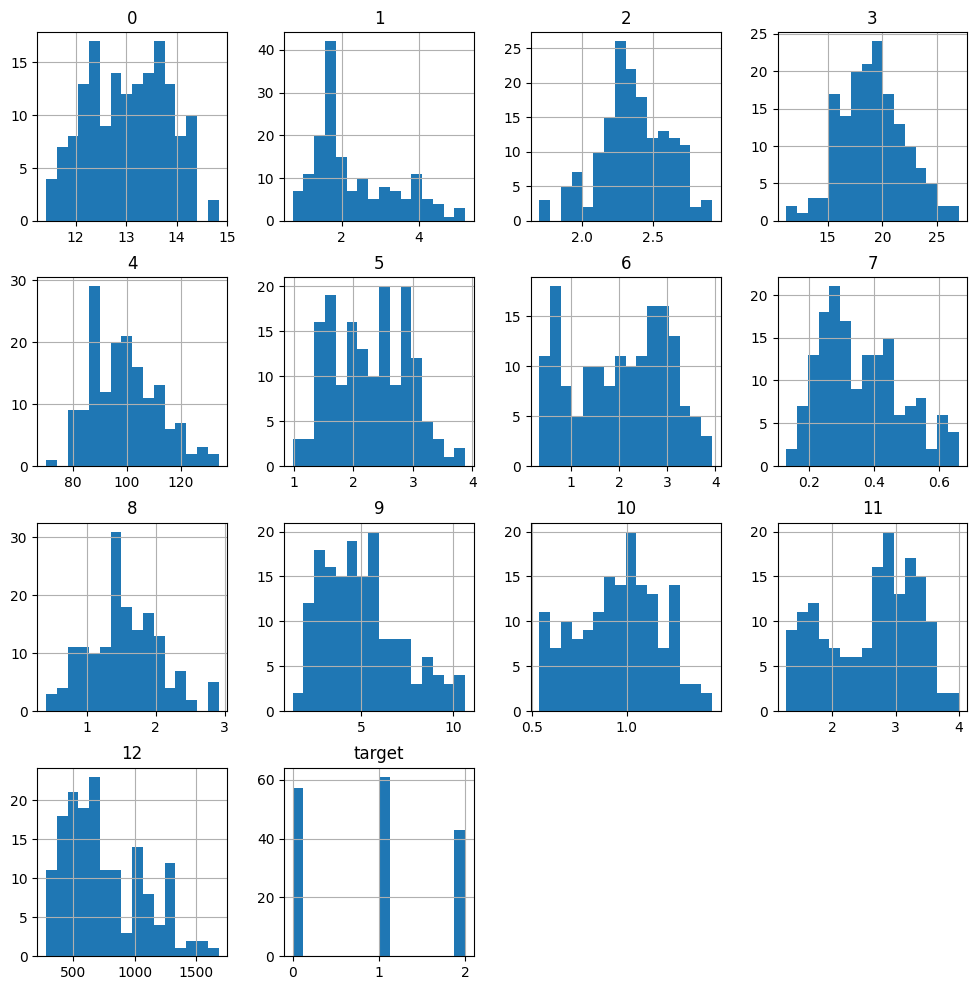

In [23]:
df.hist(bins=16, figsize=(12, 12))
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9444444444444444
Confusion matrix:
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



## Exercise 2
For the `fetch_california_housing` dataset from the `sklearn.datasets` module, perform a DEA analysis and regression using `KNN`. Test the model's performance for different values of `k-neighbors`. Remember to scale the data.

<br>

Example of loading data:

```
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target
```

In [35]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
from sklearn.metrics import mean_squared_error, r2_score

data = fetch_california_housing()
X = data.data
y = data.target

df = pd.DataFrame(X)
df['target'] = y

display(df.info())

print("Table of null values")
display(df.isnull().sum())
print()

print("Target")
display(df['target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20640 non-null  float64
 1   1       20640 non-null  float64
 2   2       20640 non-null  float64
 3   3       20640 non-null  float64
 4   4       20640 non-null  float64
 5   5       20640 non-null  float64
 6   6       20640 non-null  float64
 7   7       20640 non-null  float64
 8   target  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


None

Table of null values


,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
target,0



Target


,count
target,
5.00001,965
1.37500,122
1.62500,117
1.12500,103
1.87500,93
...,...
0.34200,1
0.46200,1
3.52000,1


Boxplot of 0:



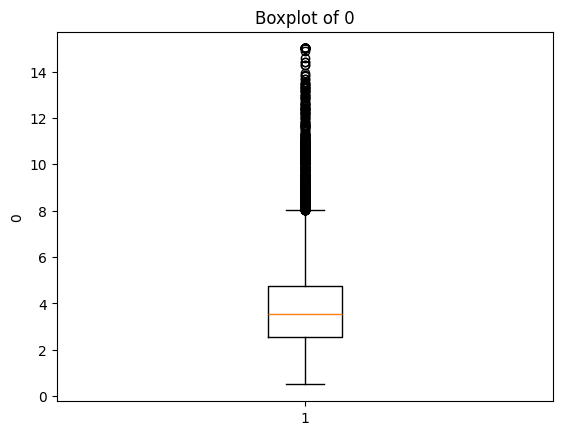


Boxplot of 1:



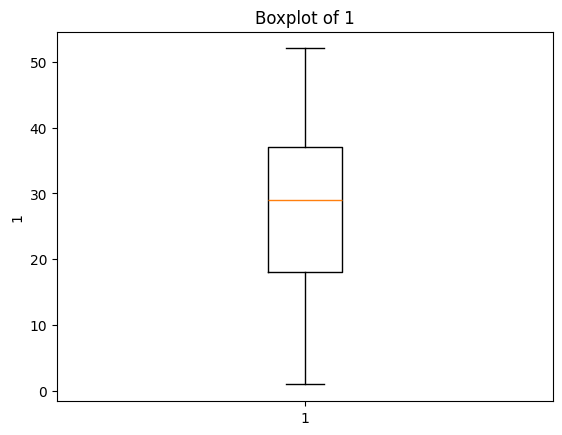


Boxplot of 2:



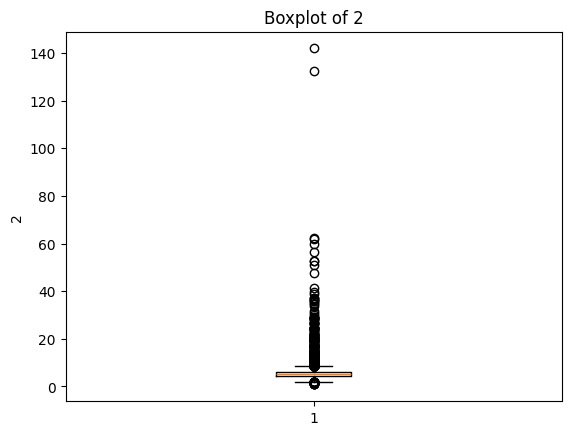


Boxplot of 3:



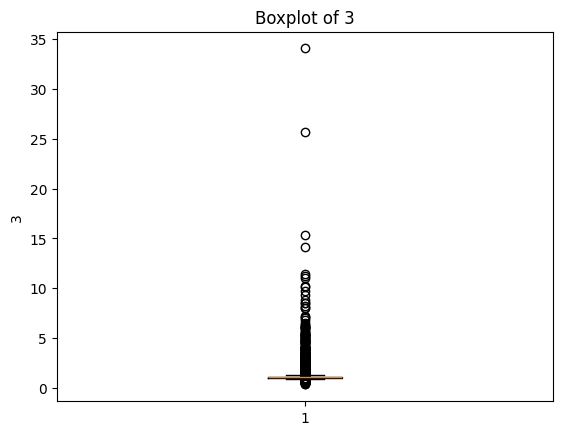


Boxplot of 4:



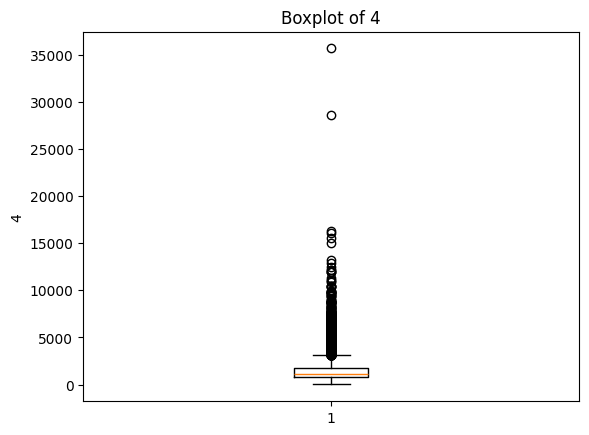


Boxplot of 5:



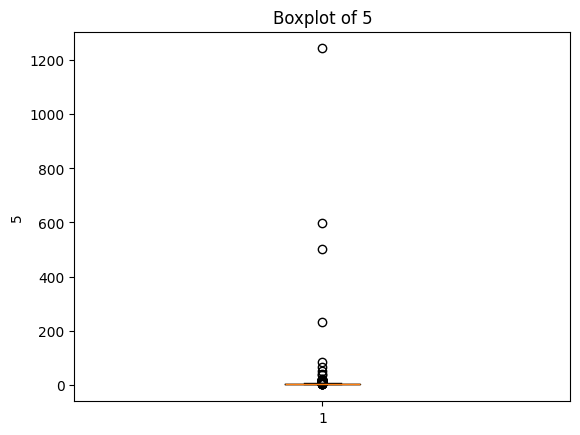


Boxplot of 6:



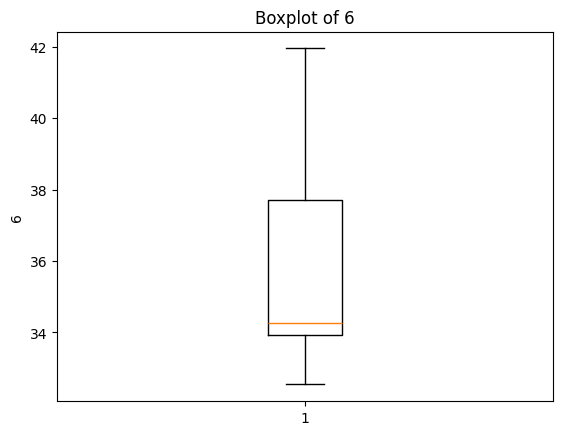


Boxplot of 7:



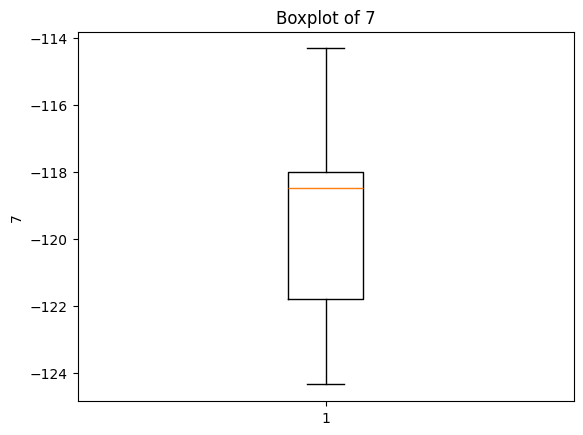


             0     1         2         3       4         5      6       7  \
0       8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23   
1       8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22   
131    11.6017  18.0  8.335052  1.082474   533.0  2.747423  37.84 -122.19   
134     8.2049  28.0  6.978947  0.968421   463.0  2.436842  37.83 -122.19   
135     8.4010  26.0  7.530806  1.056872   542.0  2.568720  37.83 -122.20   
...        ...   ...       ...       ...     ...       ...    ...     ...   
20426  10.0472  11.0  9.890756  1.159664   415.0  3.487395  34.18 -118.69   
20427   8.6499   4.0  7.236059  1.032528  5495.0  2.553439  34.19 -118.80   
20428   8.7288   6.0  8.715842  1.102970  3385.0  3.351485  34.23 -118.83   
20436  12.5420  10.0  9.873315  1.102426  1179.0  3.177898  34.21 -118.69   
20503   8.2787  27.0  6.935065  1.103896   243.0  3.155844  34.33 -118.75   

        target  
0      4.52600  
1      3.58500  
131    3.92600  
134   

None

In [36]:
columns = df.drop(columns="target").columns

for col in columns:
    print(f"Boxplot of {col}:")
    print()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()
    print()

for col in columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(outliers)
  print()

  outlier_indices = outliers.index.union(outliers.index)
  df = df.drop(outlier_indices)

display(df.info())

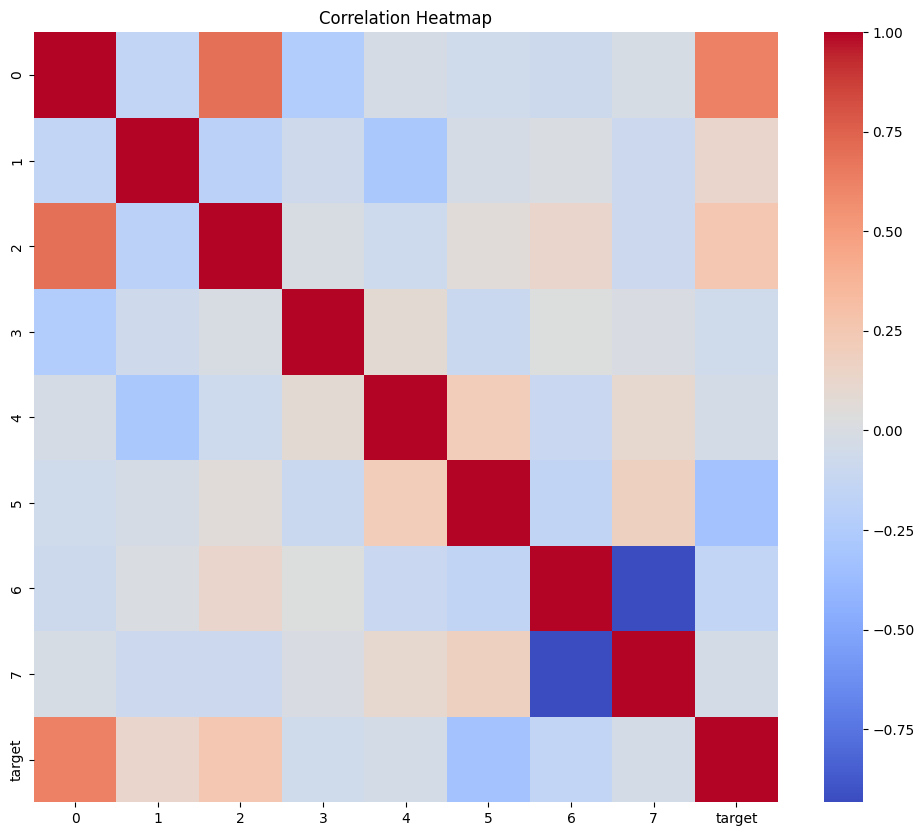

In [37]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [38]:
print("Table of the statistical data for all numerical columns:")
display(df.drop(columns="target").describe())
print()
print("Target")
display(df['target'].value_counts())

Table of the statistical data for all numerical columns:


,0,1,2,3,4,5,6,7
count,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000
mean,3.711118,29.665735,5.165993,1.047427,1271.323143,2.846678,35.654022,-119.626791
std,1.478956,12.254293,1.047209,0.065861,631.894783,0.631920,2.131764,1.993803
min,0.536000,1.000000,2.133929,0.869822,5.000000,1.161290,32.540000,-124.350000
25%,2.583300,19.000000,4.431250,1.003155,811.000000,2.416357,33.940000,-121.830000
50%,3.533300,30.000000,5.148936,1.044118,1157.000000,2.797251,34.280000,-118.560000
75%,4.650000,38.000000,5.865306,1.088825,1633.000000,3.230903,37.730000,-118.040000
max,8.011300,52.000000,8.275862,1.232975,3183.000000,4.571046,41.950000,-114.570000



Target


,count
target,
5.00001,444
1.37500,80
1.62500,75
2.25000,69
1.87500,66
...,...
3.99400,1
2.06600,1
3.23900,1


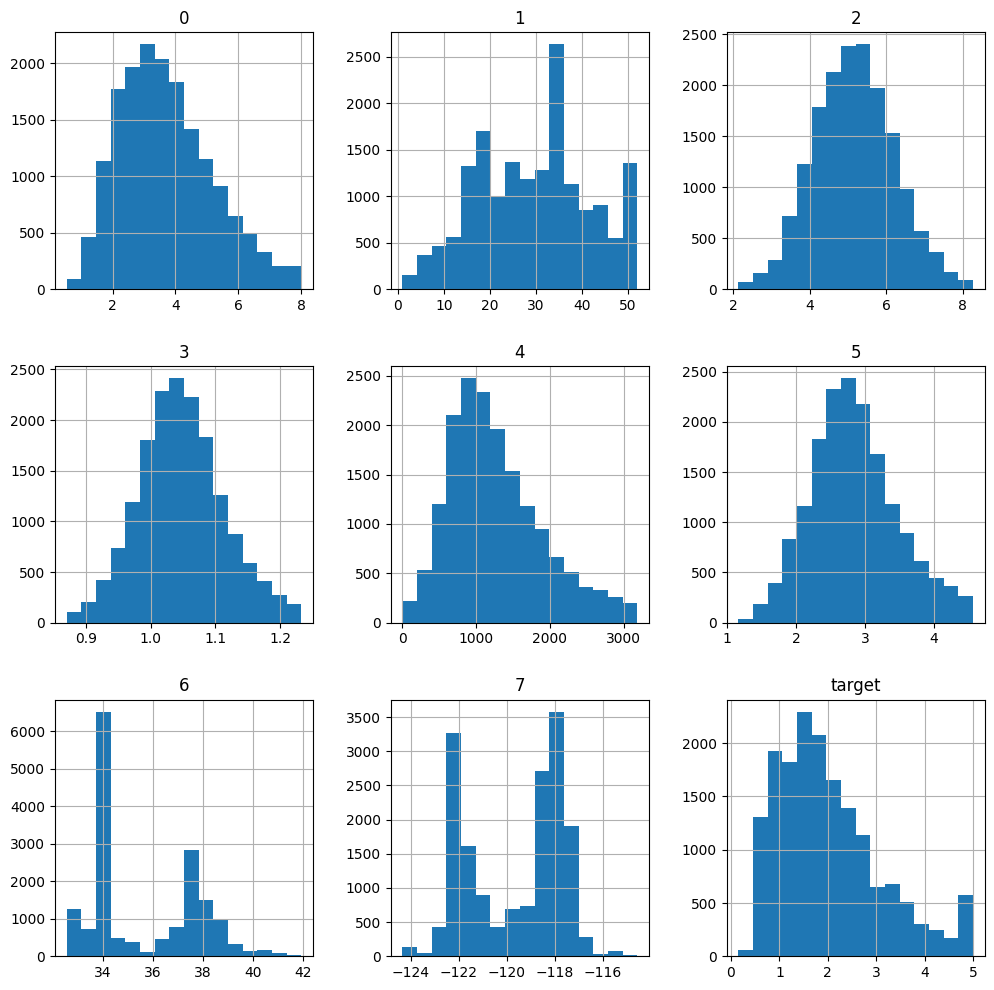

In [39]:
df.hist(bins=16, figsize=(12, 12))
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

print("R2 Score:")
print(r2_score(y_test, y_pred))


Mean Squared Error: 0.4666634350517549
R2 Score:
0.6438795499720962
